In [1]:
import numpy as np
import qiskit.quantum_info as qi
import matplotlib.pyplot as plt
from scipy.linalg import expm

In [8]:
n_qubits=2
N = 2**n_qubits
epsilon_max = 0.2
U=qi.random_unitary(N).to_matrix()

n_matrices = 10000
epsilon_power = 2**(2**N)
rng = np.random.default_rng()

In [9]:
def dagger(x):
    return np.transpose(x.conjugate())

# def mkExp_U(N,epsilon,A):
#     return np.identity(N)+1j*epsilon*A-epsilon**(2)*A**(2)-(1j/6)*epsilon**(3)*A**(3)-(1/24)*epsilon**(4)*A**(4)+(1j/120)*epsilon**(5)*A**(5)

def unitarity_diff(U):
    diff=U@dagger(U)-np.identity(N)
    return np.linalg.norm(diff)

def target_diff(U,U_target):
    return np.linalg.norm(U-U_target)

def mkFid(U_list,n_fid_sample,ind=[0,0]):
    fid=[]
    for i in range(n_fid_sample):
        for j in np.arange(i+1,n_fid_sample,1):
            UU=U_list[i]@dagger(U_list[j])
            fid.append(abs(UU[ind[0]][ind[1]])**2)
            
    fid=np.array(fid)
    return fid

In [10]:
def getHaarFid(U,epsilon_power = 2**(2**N),d=1e-7,epsilon_max=epsilon_max,nBins=1000,nSamples=500,bin_low=0.8):
    U_prime_list=[]

    for i in range(n_matrices):
        M=qi.random_unitary(N).to_matrix()
        epsilon = (epsilon_max+d) * rng.power(epsilon_power+1) # epsilon_power should be the polynomial power + 1

        A=(M+np.transpose(M.conjugate()))
        A=A/np.linalg.norm(A)
        U_exp=expm(1j*epsilon*A)
        U_prime=U@U_exp

        norm_ratio=np.linalg.norm(U)/np.linalg.norm(U_prime)
        U_prime = U_prime*norm_ratio

        if target_diff(U_prime,U)>epsilon_max:
            continue

        U_prime_list.append(U_prime)

    U_prime_list=np.array(U_prime_list)
    fid_prime=mkFid(U_prime_list,nSamples,ind=[0,0])
    hist_Haar=np.histogram(fid_prime,bins=np.linspace(bin_low,1,nBins),weights=np.ones_like(fid_prime)/fid_prime.shape[0])[0]

    return hist_Haar

In [11]:
unitarity_diff_list=[]
target_diff_list=[]
U_prime_list=[]

for i in range(n_matrices):
    M=qi.random_unitary(N).to_matrix()
    epsilon = (epsilon_max+1e-8) * rng.power(epsilon_power+1) # epsilon_power should be the polynomial power + 1
    
    A=(M+np.transpose(M.conjugate()))
    A=A/np.linalg.norm(A)
    U_exp=expm(1j*epsilon*A)
    U_prime=U@U_exp
    
    norm_ratio=np.linalg.norm(U)/np.linalg.norm(U_prime)
    U_prime = U_prime*norm_ratio
    
    print(target_diff(U_prime,U))
    if target_diff(U_prime,U)>epsilon_max:
        continue
    
    U_prime_list.append(U_prime)
    unitarity_diff_list.append(unitarity_diff(U_prime))
    target_diff_list.append(target_diff(U_prime,U))
    
    
   
U_prime_list=np.array(U_prime_list)
unitarity_diff_list=np.array(unitarity_diff_list)  
target_diff_list=np.array(target_diff_list)

0.19991273651389313
0.19988186920823453
0.19987094723584012
0.19987573718313595
0.19986972059975908
0.19983411441094917
0.1998975302165418
0.19989596040274912
0.19988108468504245
0.19989831626926755
0.1998951921342105
0.1998808689689833
0.1999062573916125
0.19987011943247057
0.19982608950423444
0.1998695833286608
0.19990392952987293
0.19989983579990453
0.19987858757894048
0.1998973746154786
0.1998476781292067
0.19988956934164911
0.19988183443895882
0.1998363302604697
0.1999066717292878
0.1998580451183594
0.19983385628285877
0.1998991261551971
0.19985424512687378
0.1998928314003759
0.19985140041451305
0.19986362351006895
0.19985268228768246
0.19986063596440826
0.19985702998809604
0.19989689709440375
0.19987318722626718
0.19987842436542738
0.1998329085288382
0.1998893582566813
0.1998520790478859
0.19990073799821714
0.19990140119658628
0.19987371677049962
0.19987951187823486
0.19984938395367222
0.19990896849562018
0.19990074837475252
0.19987965966005045
0.19985041010746582
0.1998743533731

0.19987860836843796
0.19987560210779914
0.1998768822661975
0.19984414034319556
0.1998404123088758
0.19985547863907416
0.1998465443512277
0.19984121024182996
0.19984443979382002
0.19988563577264554
0.1998655831004111
0.1998952348678298
0.19982662100157758
0.19988007719394843
0.19988479913684293
0.19987037975628416
0.19987971695766993
0.19990547751417762
0.19986754376099128
0.19987159193910187
0.19989726900213917
0.1998338494327366
0.19988617404621892
0.19987501053968967
0.19985112639147773
0.19989917524793488
0.1998694701951448
0.19986608414974683
0.1998728400234042
0.19988995450598657
0.1998922052961421
0.19985211478159026
0.19987414763204406
0.19985100387254293
0.19986664044395858
0.19985865879932527
0.19986019128233135
0.1998518830627995
0.19987127344662106
0.1998330272581695
0.19984020400362126
0.19983154344542764
0.19989109696583746
0.19987222151045791
0.19983809012864248
0.19988577678168767
0.1998699298038056
0.19988879466601195
0.19989252234402174
0.19989371892336974
0.1998896050

0.1998880313525219
0.19990549257113252
0.199874984627425
0.19984185553860132
0.1998859184663656
0.1998529611189322
0.1998571659845691
0.1998737856357752
0.1998913987802327
0.1999136971880859
0.19988440277754743
0.19986602697148273
0.19990150468983744
0.1999005443177
0.19985744208837647
0.19985142333752406
0.1998419432118391
0.1998524904742964
0.1998764065886395
0.19983279827720693
0.19989020300881863
0.19983941583549167
0.19988927466512235
0.19988406147438867
0.19982232929061478
0.19989640663515176
0.19988559467683065
0.19990781962783416
0.19987142778129302
0.1998377122899471
0.19986894527073704
0.19979303041400456
0.19987240120397573
0.19974985158821165
0.19986580731950962
0.19987402530086806
0.19986020050283046
0.19984414150503488
0.19985655966944268
0.1998601808902249
0.19982429335808533
0.19989497547810953
0.19991033556384846
0.1998812397991387
0.1999141860693272
0.19987836566042627
0.19985054985089237
0.19987674542169043
0.1998854952675971
0.19989032571499002
0.19979849639857916
0

0.19987435963471245
0.19987279197907468
0.1998817346795892
0.1999099566181816
0.19985680723583085
0.19987930548274693
0.19983482358557855
0.19991165356546245
0.19983977675623177
0.1999070651077928
0.19987276811800428
0.1999100353220706
0.19985543235088957
0.19988549501710065
0.19987222596797238
0.19987182895162647
0.19987563414339835
0.19984290989949452
0.19987603863422385
0.1998851935066583
0.19987776073655797
0.1998974748462177
0.1999004560041914
0.1998963573747909
0.19990673565142855
0.19989667882410797
0.19989784850761416
0.1998723377681129
0.19983104388881623
0.19987186867840312
0.1998821076013034
0.1998859086268553
0.19990118577746904
0.1999059861854054
0.19984584494315014
0.19990840565349222
0.1999053332045977
0.19983791354614086
0.19987457643238313
0.19987368351736928
0.1999000570175596
0.19987660456858966
0.19988533585435206
0.19989871898506026
0.1998668114624951
0.1998745295298443
0.1998835094271733
0.1998858178263573
0.1999041723603509
0.19979549782674275
0.19987643030257524

0.19989475291016795
0.1999014591263371
0.1997759316459367
0.19985927282038396
0.19985378991265085
0.19988949405146142
0.199893962739606
0.1998684169245872
0.19982916658625907
0.19988564346542206
0.19990274949734346
0.19989900552323242
0.19989257056965723
0.199888942576827
0.19988365303325553
0.19991214796289886
0.19987730398257855
0.19985190608848655
0.19986890300565474
0.19989367048065157
0.19988882837245028
0.19991297109869638
0.19987467250199867
0.19986500468849278
0.19982714327702994
0.1998706983153733
0.19988150759209647
0.19989017421116406
0.19983966498495245
0.19989022031732415
0.19985217490407123
0.19988124999488424
0.19987254787977513
0.1998705613929914
0.19976517066141483
0.19983126750306293
0.199854794271045
0.19985782317858256
0.19989794847486647
0.19988477266695298
0.19986626668629093
0.199863438273806
0.19989012049151356
0.1998948193696912
0.19988571305706887
0.19987989130240333
0.19986936173636405
0.19987116093229995
0.1998863291216019
0.1998516998338947
0.19989644656005

0.1998637561233426
0.19991004524574504
0.19986150409019038
0.19983994676376948
0.19989241159073837
0.19987865452194745
0.19986718595060793
0.19986497437341338
0.19987990924356092
0.1998512984868683
0.19989312074968776
0.199891507218392
0.19988734956396756
0.1999129034151447
0.1998594661109356
0.19989327048748531
0.1999056318717768
0.19990093359969155
0.1998561181456607
0.19987494343714415
0.1998142170158874
0.19990773103116333
0.19988267277974728
0.19977593099528843
0.19980008552204834
0.19988220738202714
0.1998782058631475
0.19983986660690536
0.19987444739790078
0.19989661897263347
0.19985034824403092
0.19989652875079048
0.19987957624662664
0.19984396655890205
0.19985257371167228
0.19988115159052972
0.19988354980539955
0.1999064650089637
0.19986202614961351
0.19987817892437115
0.1998887026460016
0.19988655631427713
0.19989236460845997
0.1998056977663505
0.19983954747334856
0.19983484307574367
0.1998915251410145
0.19990312856208545
0.19982882357707765
0.19984278026247979
0.199906180047

0.19985113348601177
0.1998617292148585
0.19986675003441562
0.19984708340430646
0.19985900207091625
0.1998475267442505
0.19986921154380013
0.19984700519021517
0.19987172792212074
0.1998513534307127
0.19986067796940085
0.19986190804518145
0.1998525736844275
0.19990583719431357
0.1998559906774291
0.1998222153456693
0.199840061616755
0.19986979226079496
0.1999131770406002
0.19982727402709055
0.1999143404162566
0.19988646394706064
0.19986915805412286
0.199851902220894
0.19986085891607952
0.19989581608213716
0.1998916473387354
0.19988267202092835
0.19987430262278746
0.19989607209694776
0.19988652493277087
0.19983851106426312
0.19989052266108795
0.19989592195468545
0.19987494848778026
0.19988765670360895
0.19983786843526533
0.19987539718565947
0.19990337721116921
0.1998291585858096
0.19985845922872597
0.19985854788914928
0.1998760138116301
0.1998829425381009
0.19980178950385966
0.19984511346453296
0.19988592583194678
0.1998878223021606
0.1998888994458486
0.19990437858152352
0.1997994540279726

0.19987094915059345
0.19987049653105568
0.19988018204290203
0.19990540567212628
0.19986759776481502
0.19990666492624823
0.19991054408563036
0.1998841502810278
0.19982989355921335
0.19988561978567107
0.19989047463802292
0.19984953278601175
0.19990530853532326
0.19987735935594517
0.1998888133897754
0.19985453228601555
0.19986617404542448
0.19990530684367705
0.19988259454864343
0.19984253091932527
0.19988078229019102
0.19987775544157024
0.19985182505559815
0.1998575904083519
0.1998978192791702
0.19985848372499
0.1999084493387996
0.19987625297381945
0.19987671089195944
0.1998552910907044
0.1998795317575435
0.1998838789777019
0.19979902542106148
0.19985210825395353
0.19981845019000755
0.19988389710719878
0.19991443175052653
0.19987729769755824
0.19988587514362463
0.19984335824373708
0.19988198082101305
0.19988147117436061
0.19990205196992675
0.19982845449206937
0.19987581529726706
0.19988796211668894
0.19987082551789073
0.1998959812300729
0.19990916443202975
0.19989419698404534
0.1998046429

0.19986211972127454
0.19988803476077094
0.1998721551342291
0.1998766235419529
0.19988549942413386
0.1998502901382133
0.1998831042880015
0.19986399208630576
0.19988936222950637
0.19990114854936297
0.19978246050750445
0.19985064754797718
0.19987118416053232
0.19985250072457122
0.19982878549216235
0.19988628669944364
0.19987185940760938
0.19983037317423874
0.19988180644855844
0.19988643760519254
0.1999056260775015
0.19986913913351514
0.19985435795742268
0.19986355117638624
0.1998477237529323
0.19984850107009347
0.19988886302218714
0.19989093716932246
0.1997996102376231
0.19986510338118463
0.19987509096897235
0.19990532747480605
0.1998648840322468
0.1998868492911663
0.19987882065675194
0.19984003831158456
0.19985263174133022
0.19986511776903138
0.19982214902471224
0.19987208518396576
0.19989006711754131
0.19979721206063736
0.19985413585784664
0.19967818545068178
0.19989974953493464
0.19987467242286477
0.19986418552187202
0.19981084176746164
0.19989942169964328
0.1998318284317278
0.19986843

In [12]:
fid_prime=mkFid(U_prime_list,1000,ind=[0,0])

<Figure size 432x288 with 0 Axes>

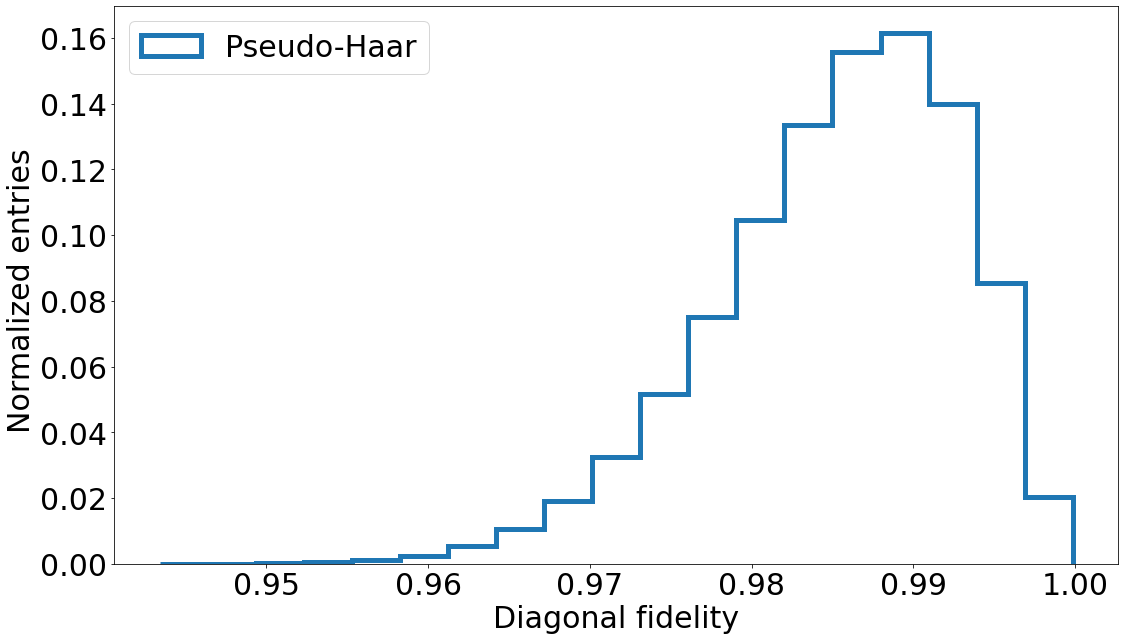

In [13]:
LabelSize=30
plt.figure(1)
plt.figure(figsize=(16,9))

nBins=20
bin_min=fid_prime.min()
bin_max=fid_prime.max()
plt.hist(fid_prime,linewidth=5.0,weights=np.ones_like(fid_prime)/len(fid_prime),bins=np.linspace(bin_min,bin_max,nBins),histtype='step',label='Pseudo-Haar');
plt.xlabel('Diagonal fidelity',fontsize=LabelSize)
plt.ylabel('Normalized entries ',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.legend(fontsize=LabelSize)
plt.tight_layout()
plt.show()


Next, generate a quantum circuit and compute its local expressibility

In [14]:

from qiskit.circuit import QuantumRegister,ClassicalRegister
from qiskit import QuantumCircuit
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit.library import ZZFeatureMap,ZFeatureMap
from qiskit.quantum_info import SparsePauliOp
import qiskit.quantum_info as qi

In [60]:

qr = QuantumRegister(n_qubits)
qc = QuantumCircuit(qr)
feature_map = ZFeatureMap(feature_dimension=n_qubits,reps=1,parameter_prefix="inputs")
ansatz=RealAmplitudes(n_qubits, reps=5)
qc.compose(feature_map, inplace=True) 
qc.compose(ansatz,inplace=True)    


In [61]:
observable1 = SparsePauliOp.from_list([("Z" *n_qubits, 1)])

estimator_qnn = EstimatorQNN(
    circuit=qc, observables=observable1, input_params=feature_map.parameters, weight_params=ansatz.parameters
)

In [68]:
def getFid_ansatz(randomWeights,nBins=200,bin_low=0.8):
    tmp_list=[]
    for i in range(10000):
        tmp_randomWeights = randomWeights+0.15 * np.random.rand(len(randomWeights))
        tmpU=qi.Operator(qc.assign_parameters(zeroInputs+list(tmp_randomWeights))).to_matrix()
        #print(target_diff(tmpU,U_target))
        if target_diff(tmpU,U_target)<epsilon_max:
            tmp_list.append(tmpU)
        if len(tmp_list)>=500:
            print(i," attempts used")
            break
    fid_ansatz=mkFid(tmp_list,len(tmp_list),ind=[0,0])
    hist_ansatz=np.histogram(fid_ansatz,bins=np.linspace(bin_low,1,nBins),weights=np.ones_like(fid_ansatz)/fid_ansatz.shape[0])[0]
    return hist_ansatz

In [69]:
from scipy.special import rel_entr


In [70]:
n_init=10

E_list=[]
grad_list=[]
gradMag_list=[]
kl_pq_list=[]


# E_list=list(E_list)
# grad_list=list(grad_list)
# gradMag_list=list(gradMag_list)
# kl_pq_list=list(kl_pq_list)

for n in range(n_init):
    print(n)
    randomWeights=np.random.rand(estimator_qnn.num_weights)*np.pi*2
    zeroInputs=[0]*estimator_qnn.num_inputs
    E=estimator_qnn.forward(zeroInputs,randomWeights).flatten()[0]
    grad=estimator_qnn.backward(zeroInputs,randomWeights)[1][0][0]
    gradMag=np.sqrt((grad**2).sum())
    U_target=qi.Operator(qc.assign_parameters(zeroInputs+list(randomWeights))).to_matrix()
    
    
    hist_Haar=getHaarFid(U_target,nBins=20,bin_low=0.9)
    hist_ansatz=getFid_ansatz(randomWeights,nBins=20,bin_low=0.9)
    
#     print(hist_Haar)
#     print(hist_ansatz)
    kl_pq = rel_entr(hist_ansatz,hist_Haar)
    kl_pq = kl_pq.sum()
    print(kl_pq)
    E_list.append(E)
    grad_list.append(grad)
    gradMag_list.append(gradMag)
    kl_pq_list.append(kl_pq)
    
    
    
E_list=np.array(E_list)
grad_list=np.array(grad_list)
gradMag_list=np.array(gradMag_list)
kl_pq_list=np.array(kl_pq_list)

0
6444  attempts used
1.0679676614638605
1
1785  attempts used
0.7902760080562405
2
8775  attempts used
1.1229841401886804
3
1.191435151063721
4
1.2312456916389038
5
2914  attempts used
0.789947355394458
6
1579  attempts used
0.6369454712296427
7
7635  attempts used
1.0955121846114653
8
1.6747456282917117
9
1.4824080694890083


In [ ]:
# np.save("grad_list",grad_list)
# np.save("kl_pq_list",grad_list)

In [ ]:
E_list=np.array(E_list)
grad_list=np.array(grad_list)
gradMag_list=np.array(gradMag_list)
kl_pq_list=np.array(kl_pq_list)

In [ ]:
bins=np.linspace(kl_pq_list.min(),kl_pq_list[kl_pq_list!=np.inf].max(),3)
grad_var_list=[]
for i in range(len(bins)-1):
    low=bins[i]
    high=bins[i+1]
    
    tmpGradVar=grad_list[:,0][(kl_pq_list>low)&(kl_pq_list<high)].var()
    #tmpGradVar=grad_list[(kl_pq_list>low)&(kl_pq_list<high)].var()
    
    grad_var_list.append(tmpGradVar)
grad_var_list=np.array(grad_var_list)

In [ ]:
plt.scatter(1/(bins[0:-1]+0.5*(bins[1]-bins[0])),grad_var_list)
plt.xlabel('1/(KL_PQ)')
plt.ylabel('gradient variance')

In [ ]:
grad_list[(kl_pq_list>low)&(kl_pq_list<high)][:,0].var()